# <font color='#0044FB'>Introduction</font> 


The Ames Housing dataset was created in 2011 and compiled by Dean De Cock for use in data science education.

The dataset contains various explanatory variables describing almost every aspect of residential homes in Ames, Iowa, USA.

Each column of the dataset describes a characteristic of a house. A short descriptions of all the features is shown below.

## <font color=' #FD9404'>Business Case</font> 


The objective of this kernel is to predict the **Sale Price** of a property. In order to achieve this goal, various types of ML regression algorithms will be used and compared in order to find the best performing one.


This kernel can be divided into 3 main parts:

1. EDA & Data Cleaning
2. Feature Engineering Part
    - 2.a Engineering
    - 2.b Encoding
    - 2.c Scaling
3. Machine Learning Regression Algorithms
   - 3.a Multilinear Regression
   - 3.b Ridge
   - 3.c Lasso
   - 3.d Random Forest Regression
   - 3.e Gradient Boosting


## <font color=' #FD9404'>Key information about data fields</font> 



- SalePrice - the property's sale price in dollars.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $ Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

#  <font color='#0044FB'>Dataset & Libraries Loading</font> 

In [135]:
# Import all the necessary libraries (and some more, just in case...)

import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
import category_encoders as ce
from pandas import set_option
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import KFold, GridSearchCV, StratifiedShuffleSplit
from sklearn.model_selection import cross_validate, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import VarianceThreshold
from warnings import simplefilter
import warnings
warnings.filterwarnings("ignore")
import pycountry_convert as pc

In [136]:
# Import the function files

import sys
sys.path.insert(0, '../../DS_module3/functions')

from functions_plot_EDA import *
from Functions_ML_classification_1 import *
from classification_functions import *

In [137]:
# Load the dataset

df = pd.read_csv("../datasets/P2. dataset.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# <font color='#0044FB'>Exploratory Data Analysis</font> 

In [138]:
# An overall look at the data

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [139]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [140]:
df.shape

(1460, 81)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [142]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


#  <font color='#0044FB'>Data Cleaning</font> 

### Check for duplicates

In [143]:
# Do we have duplicates? No

df.duplicated().sum()

0

### Check for null values

In [144]:
# Do we have NaNs? Yes

nulls = df.isnull().sum() 
nulls = nulls[nulls > 0]
nulls

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [145]:
def missing_percentage(series, rowsnumber):
    df = pd.DataFrame(series) # add column names
    results = []
    for i in series:
            results.append(round(i/rowsnumber*100,2))
    df["percentage"] = results       
    return df

In [146]:
# Another way to calculate NaN's percentage

#total = df.isnull().sum().sort_values(ascending=False)
#percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
#missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data.head(20)

In [147]:
missing_percentage(nulls, 1460)

,0,percentage
LotFrontage,259,17.74
Alley,1369,93.77
MasVnrType,8,0.55
MasVnrArea,8,0.55
BsmtQual,37,2.53
BsmtCond,37,2.53
BsmtExposure,38,2.60
BsmtFinType1,37,2.53
BsmtFinType2,38,2.60
Electrical,1,0.07


In [148]:
# 19 columns out of 81 have at least 1 null value and some have many more

len(nulls)

19

The dataset length is of 1460 rows which means that, in some cases, the NaNs account for the great majority of that specific column. 

This is the case for Alley, PoolQC, Fence and MiscFeature columns. In these columns the NaNs constitute at least the 80% of the data.

For the extent of my personal analysis, these columns cannot provide useful information.

In [149]:
# Drop the columns that have the most null values and Id because I don't need it

df.drop(["Alley", "Fence", "MiscFeature", "Id"], axis=1, inplace=True)

In [150]:
df.shape

(1460, 77)

In [151]:
# I assume that the NaN in the pool quality feature correspond to "no pool". So I'll replace

df["PoolQC"].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [152]:
df["PoolQC"] = df["PoolQC"].fillna("NA")
df["PoolQC"].value_counts()

NA    1453
Gd       3
Fa       2
Ex       2
Name: PoolQC, dtype: int64

In [153]:
# The column FireplaceQu has almost a 50% of null values. Let's see if drop or replace

df.FireplaceQu.head()

0    NaN
1     TA
2     TA
3     Gd
4     TA
Name: FireplaceQu, dtype: object

This column indicates the fireplace quality. Seems to be an ordinal feature.
It indicates if the fireplace is manmade (masonry) or prefabricated and its location inside the house.

     Ex	Excellent - Exceptional Masonry Fireplace
     Gd	Good - Masonry Fireplace in main level
     TA	Average - Prefabricated Fireplace in main livingarea or Masonry Fireplace in basement
     Fa	Fair - Prefabricated Fireplace in basement
     Po	Poor - Ben Franklin Stove
     NA	No Fireplace

In [154]:
# Most fireplaces are of good or average quality

df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

We have no data for fireplaces of excellent quality or for houses that do not have a fireplace. That seems odd and not representative of the reality.

I initially thought to replace null values with the mode (most frequent value) which is "Good" even though this would alter and "pollute" the dataset with uncertain information.

In [155]:
df.FireplaceQu = df.FireplaceQu.fillna(df.FireplaceQu.mode().iloc[0])
df.FireplaceQu.value_counts()

Gd    1070
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [156]:
df.drop("FireplaceQu", axis=1, inplace=True)

In [157]:
# Now the column with most NaNs is LotFrontage. Let's see if drop or replace

df.LotFrontage.head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

This columns indicates a linear street connected to property. Frontage is a measure: it's the width of a lot, measured at the front part of the lot. We can assume it is expressed in "feet".

It does not seem a super relevant feature but the NaNs are not so many as to drop it, at least for now.

In [158]:
df.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [159]:
# I replace the NaNs with the mean (average value)

df.LotFrontage = df.LotFrontage.fillna(df.LotFrontage.mean())

In [160]:
# For the remaining columns the NaNs are not so many
# I replace them by the mode or the mean depending on the column's data type

for column in df: 
    if df[column].dtype != 'object':
        df[column] = df[column].fillna(df[column].mean())
    else:
        df[column] = df[column].fillna(df[column].mode().iloc[0])

In [161]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [162]:
df.shape

(1460, 76)

### Check for outliers

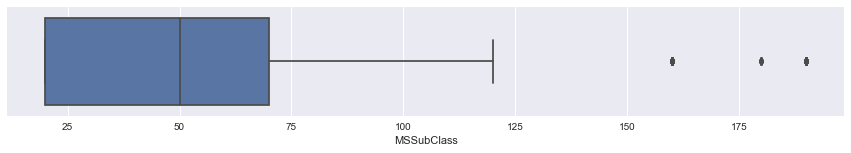

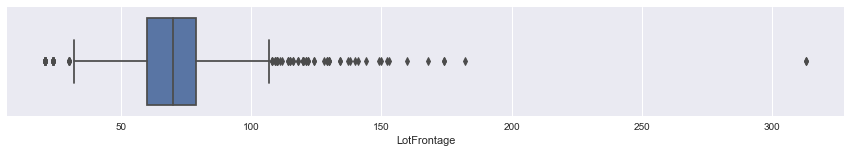

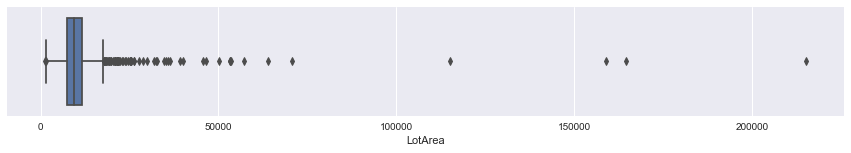

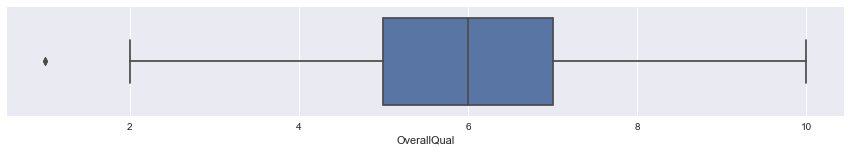

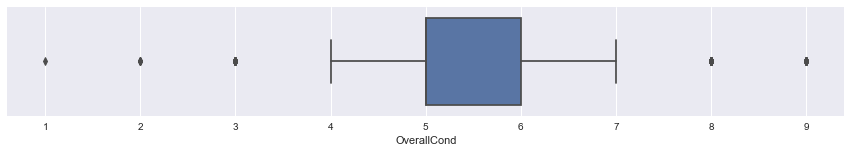

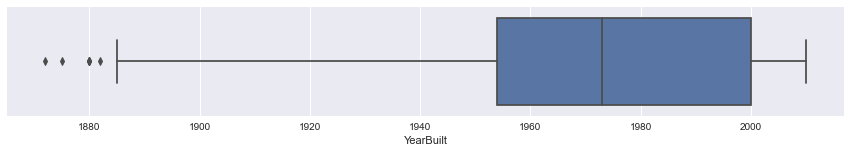

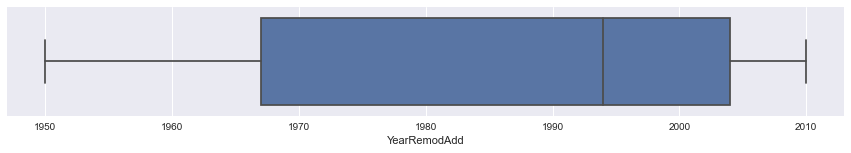

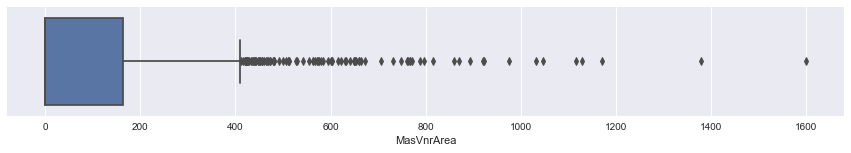

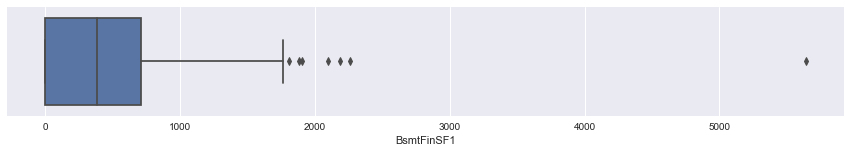

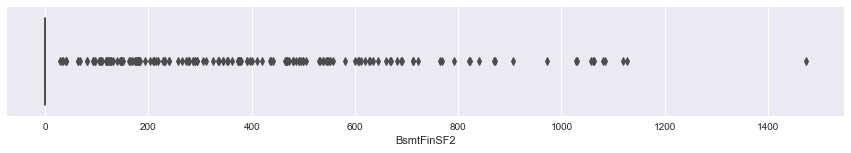

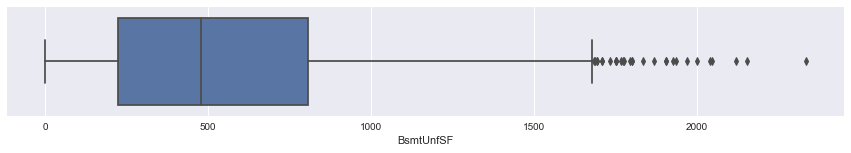

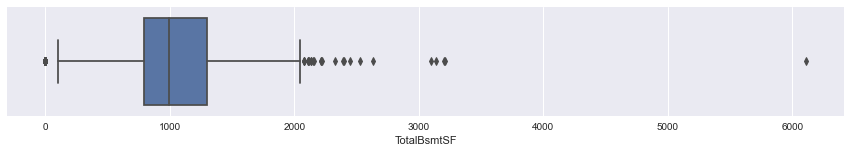

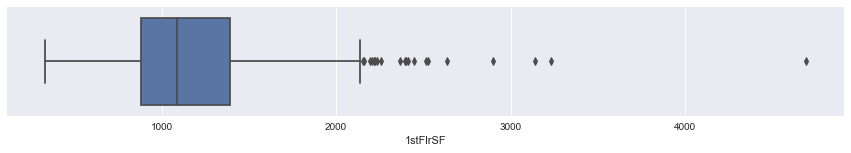

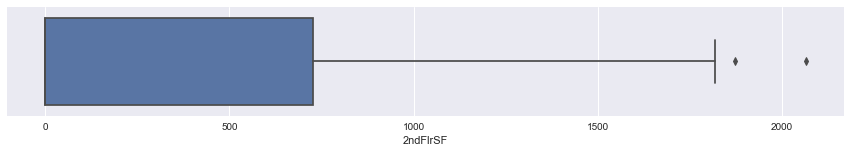

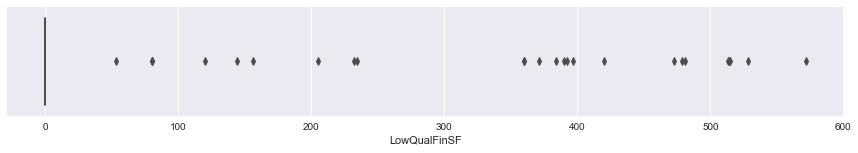

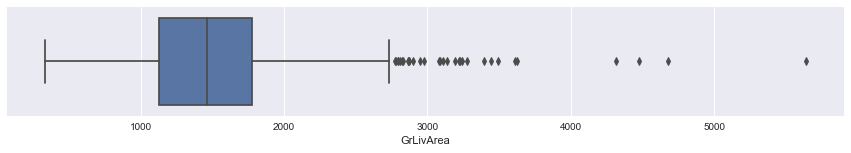

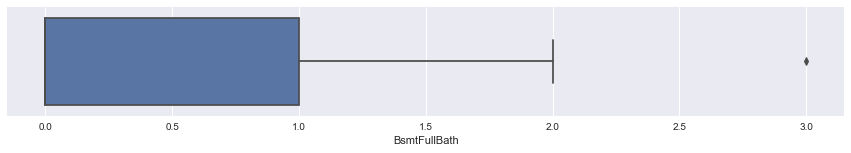

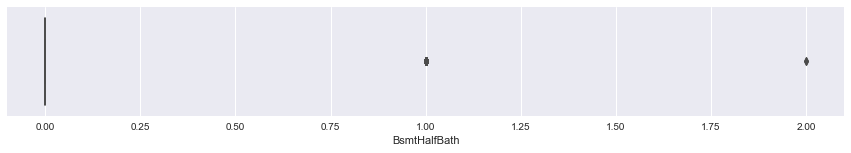

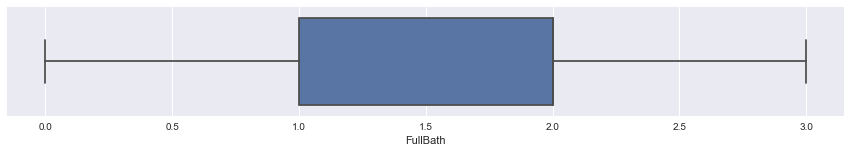

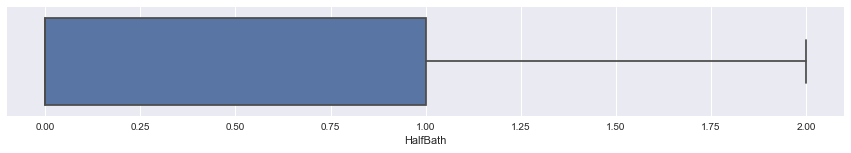

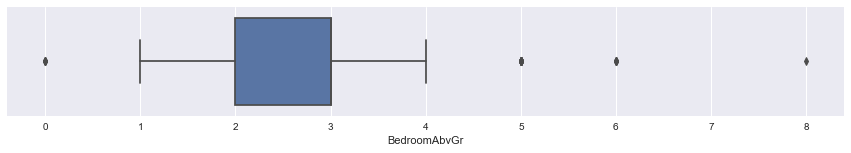

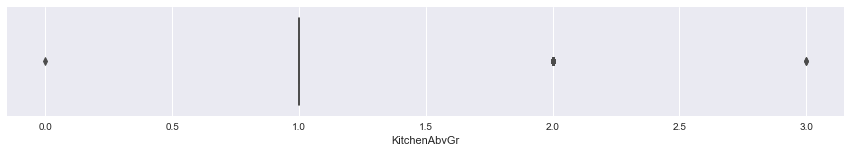

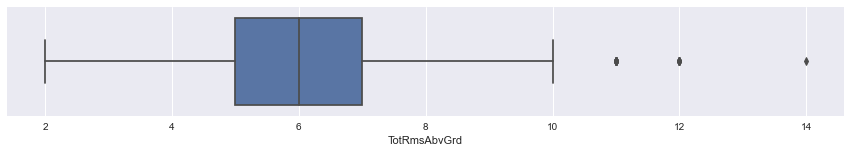

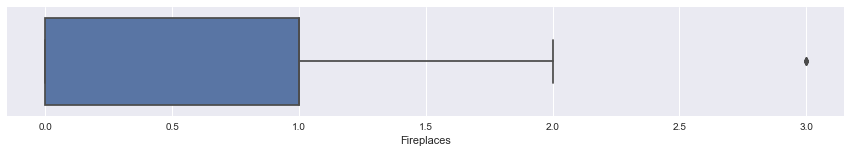

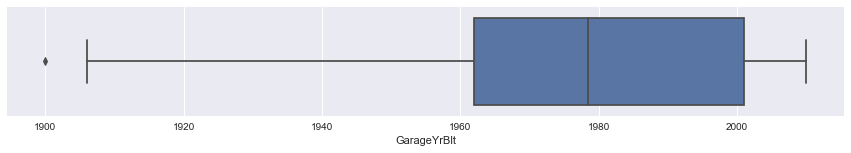

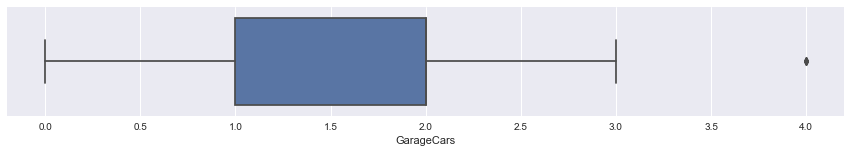

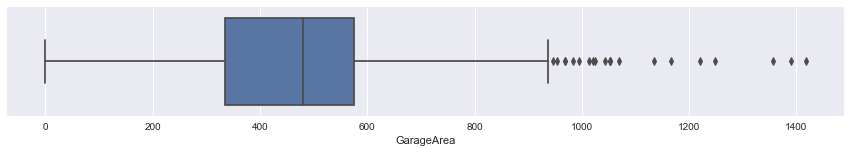

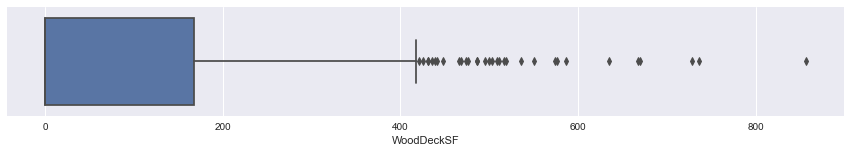

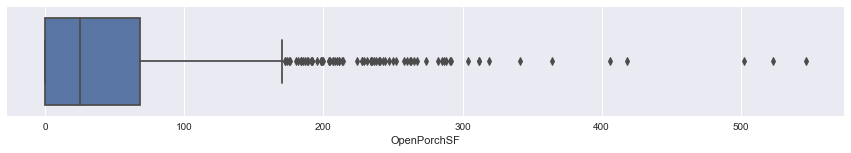

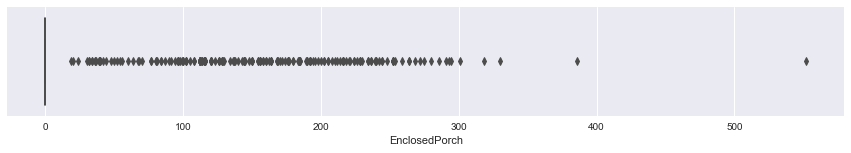

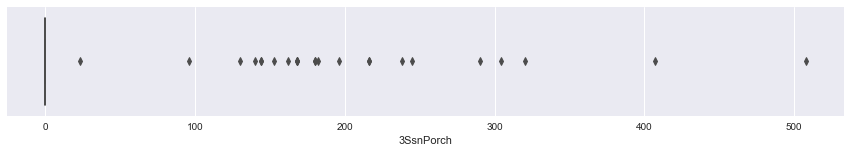

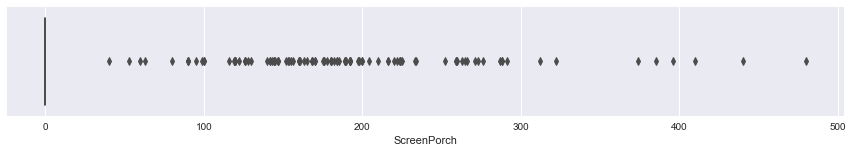

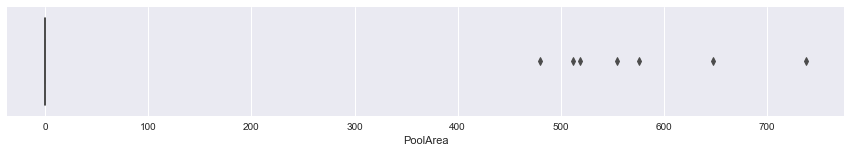

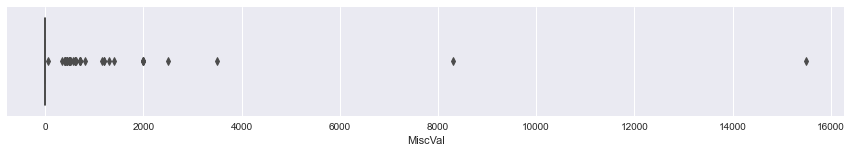

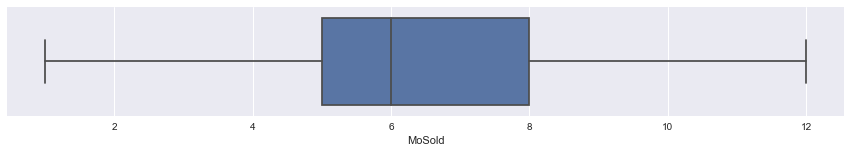

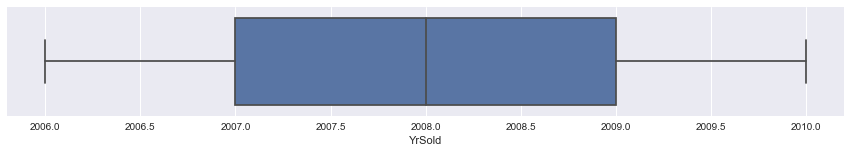

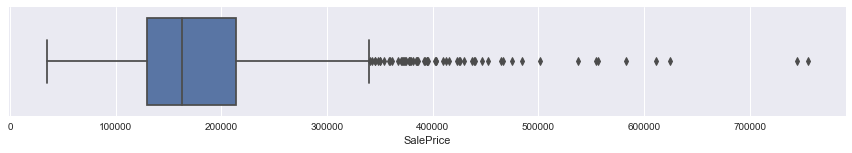

In [163]:
for col in df:
    if df[col].dtype == np.float64 or df[col].dtype == np.int64:
        fig_dims = (15, 2)
        fig, ax = plt.subplots(figsize=fig_dims)
        sns.boxplot(x=df[col],ax=ax)

In [164]:
# Remove outliers

def remove_outliers(df):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    lower_bound  = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    df = df.loc[(df[column] > lower_bound) & (df[column] <  upper_bound)]
    return df

In [165]:
df_ok = remove_outliers(df)

In [166]:
df_ok.shape

(1399, 76)

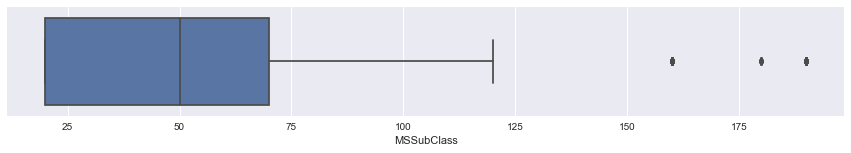

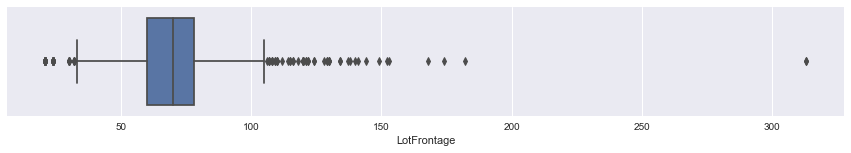

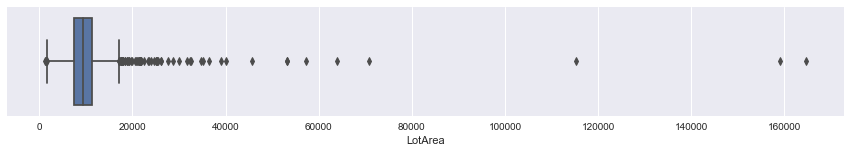

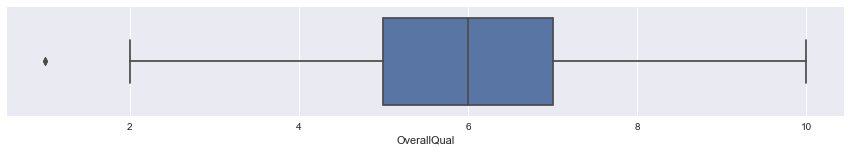

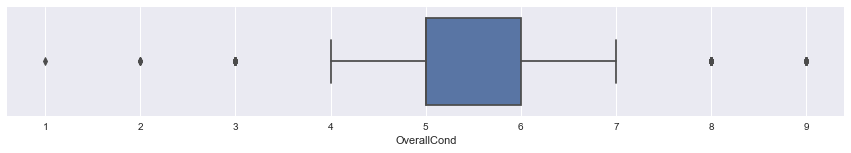

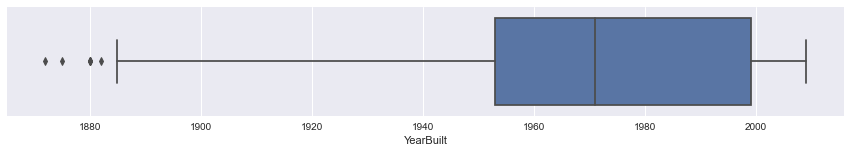

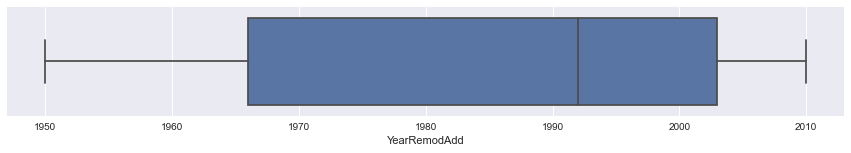

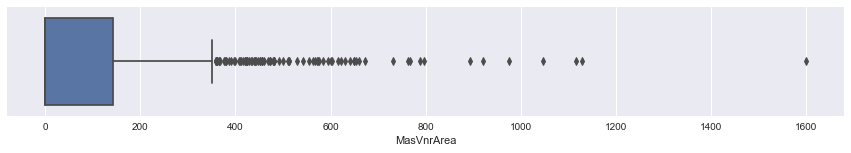

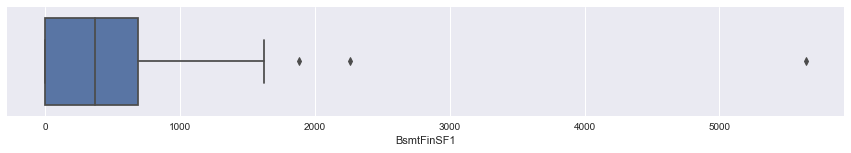

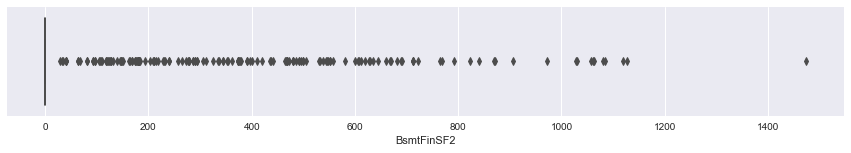

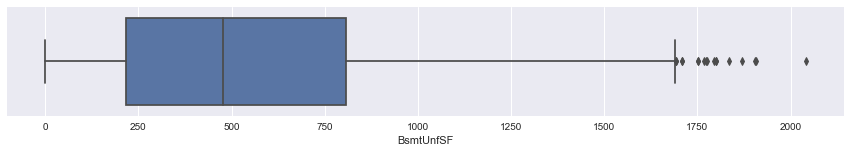

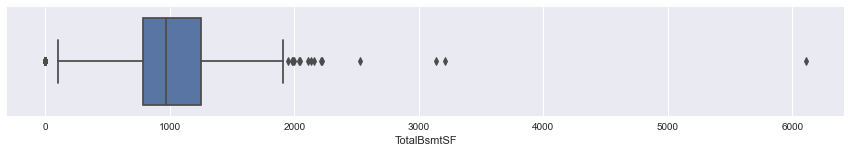

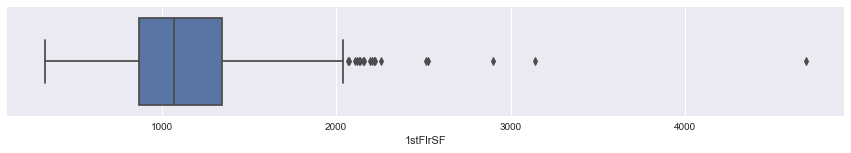

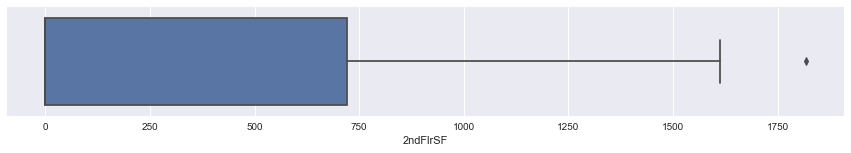

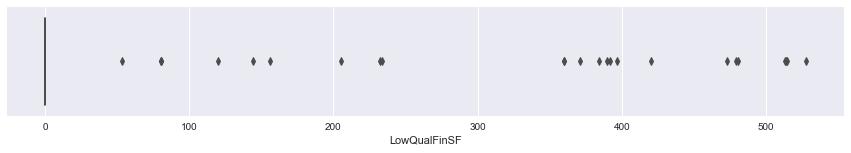

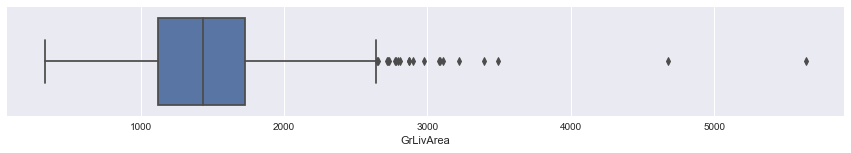

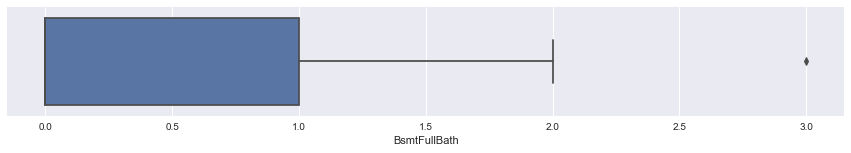

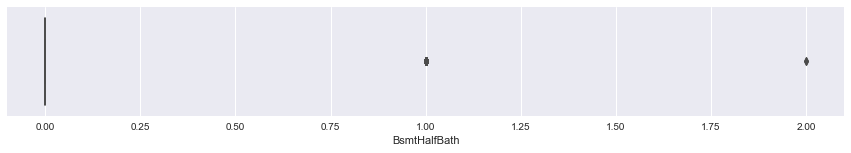

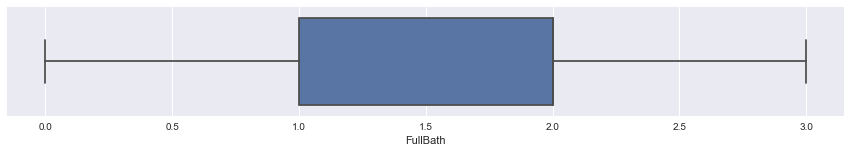

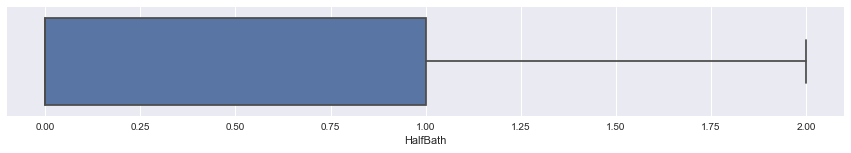

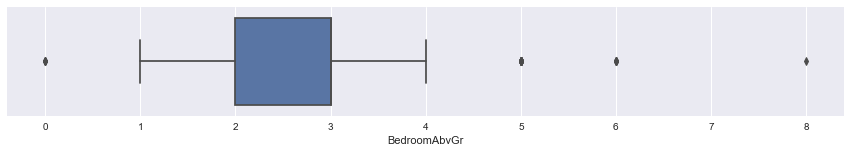

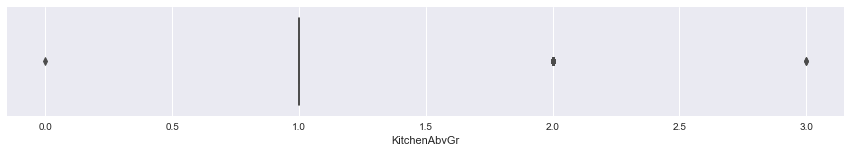

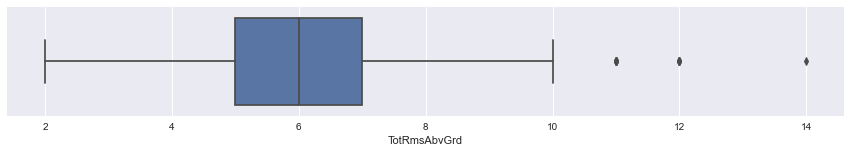

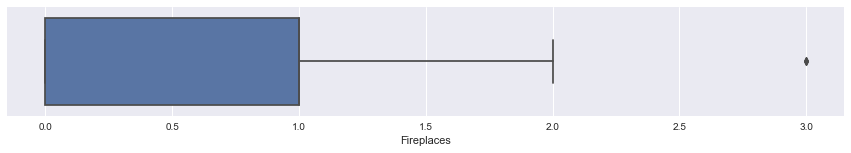

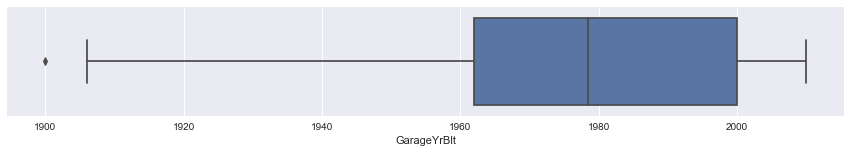

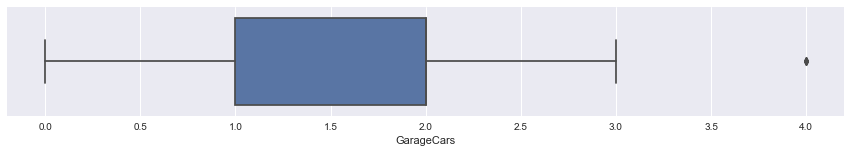

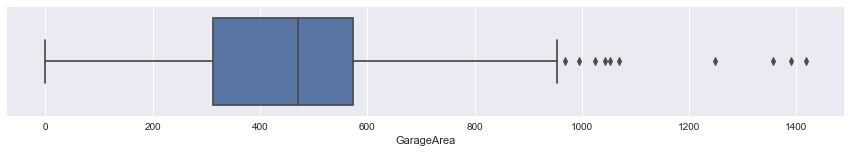

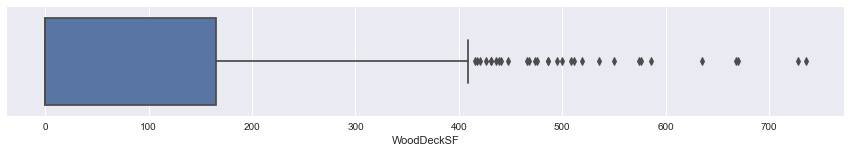

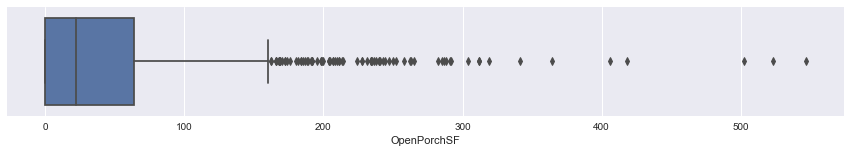

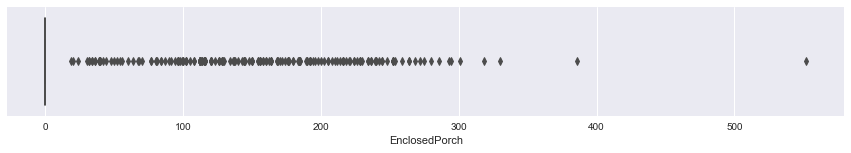

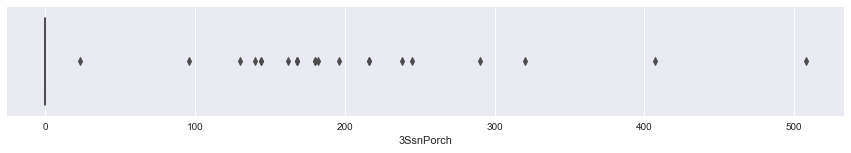

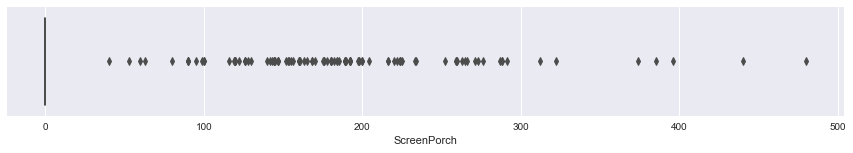

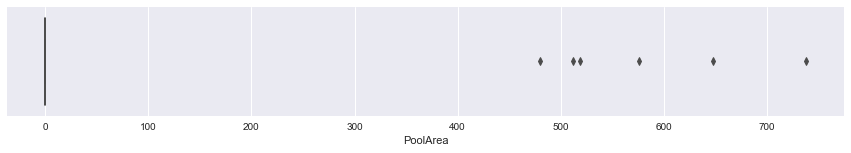

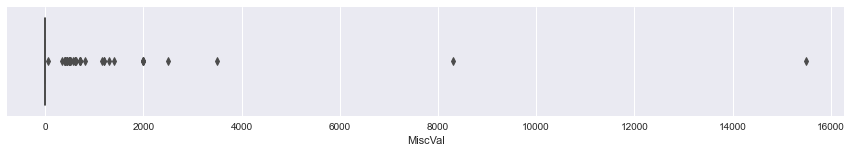

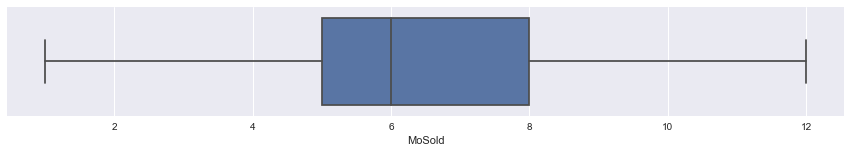

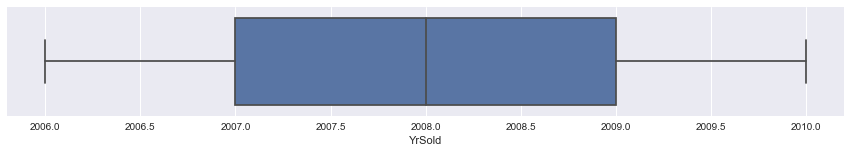

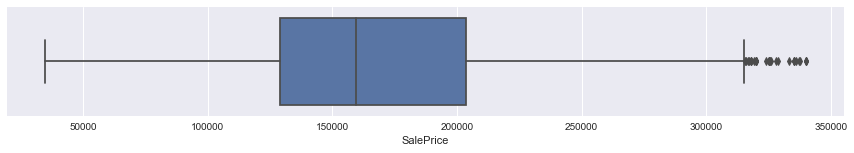

In [167]:
# Check again

for col in df_ok:
    if df_ok[col].dtype == np.float64 or df_ok[col].dtype == np.int64:
        fig_dims = (15, 2)
        fig, ax = plt.subplots(figsize=fig_dims)
        sns.boxplot(x=df_ok[col],ax=ax)

In [168]:
# Remove manually the most evident outliers

df_ok = df_ok[df_ok['LotFrontage'] < 300]
df_ok = df_ok[df_ok['LotArea'] < 100000]
df_ok = df_ok[df_ok['MasVnrArea'] < 1400]
df_ok = df_ok[df_ok['TotalBsmtSF'] < 6000]

### Features selection

In [169]:
# There are some columns that are redundant or useless. Let's drop them

df_ok.drop(["Utilities","Condition1", "Condition2", "BsmtFinSF1", "BsmtFinSF2", "BsmtFinType2", "BsmtUnfSF", "GarageCond", "GarageArea",'BedroomAbvGr', 'KitchenAbvGr'], axis=1, inplace=True)

In [170]:
df_ok

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,NA,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,NA,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,NA,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,0,0,0,NA,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,NA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,Inside,Gtl,Gilbert,...,0,0,0,NA,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,Inside,Gtl,NWAmes,...,0,0,0,NA,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,Inside,Gtl,Crawfor,...,0,0,0,NA,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,Inside,Gtl,NAmes,...,0,0,0,NA,0,4,2010,WD,Normal,142125


In [171]:
# These column correspond to the value of miscellaneous feature in $
# Does not include relevant information as the majority of values is 0

df_ok.MiscVal.value_counts()

0        1343
400        11
500         7
700         4
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

In [172]:
df_ok.drop(["MiscVal"], axis=1, inplace=True)

### Statistical overview

In [173]:
df_ok.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1393.0,57.447954,42.724243,20.0,20.0,50.000000,70.0,190.0
LotFrontage,1393.0,68.890624,19.490313,21.0,60.0,70.049958,78.0,182.0
LotArea,1393.0,9812.988514,5118.656384,1300.0,7438.0,9313.000000,11302.0,70761.0
OverallQual,1393.0,5.979182,1.279367,1.0,5.0,6.000000,7.0,10.0
OverallCond,1393.0,5.590093,1.118979,1.0,5.0,5.000000,6.0,9.0
YearBuilt,1393.0,1970.053123,30.044938,1872.0,1953.0,1971.000000,1999.0,2009.0
YearRemodAdd,1393.0,1984.000000,20.662831,1950.0,1966.0,1992.000000,2003.0,2010.0
MasVnrArea,1393.0,88.322180,152.499907,0.0,0.0,0.000000,140.0,1129.0
TotalBsmtSF,1393.0,1019.887294,383.516639,0.0,788.0,972.000000,1248.0,3206.0
1stFlrSF,1393.0,1128.062455,343.327612,334.0,869.0,1067.000000,1342.0,3138.0


### Correlations analysis

In [174]:
df_ok.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
MSSubClass,1.000,-0.395,-0.294,0.070,-0.071,0.046,0.059,0.051,-0.243,-0.253,0.314,0.044,0.102,0.012,-0.010,0.149,0.184,0.056,-0.037,0.100,-0.019,-0.009,0.002,-0.015,-0.047,-0.035,0.007,-0.017,-0.021,-0.060
LotFrontage,-0.395,1.000,0.437,0.169,-0.049,0.093,0.044,0.122,0.286,0.340,0.046,0.043,0.296,0.044,0.003,0.147,0.028,0.282,0.197,0.033,0.253,0.068,0.103,0.017,0.073,0.047,0.072,0.018,0.008,0.321
LotArea,-0.294,0.437,1.000,0.095,-0.019,0.006,-0.006,0.061,0.266,0.358,0.072,0.006,0.328,0.103,0.041,0.140,0.045,0.271,0.302,-0.046,0.215,0.157,0.138,0.009,0.059,0.088,0.074,0.004,-0.032,0.315
OverallQual,0.070,0.169,0.095,1.000,-0.070,0.561,0.531,0.326,0.469,0.382,0.288,-0.050,0.535,0.062,-0.036,0.533,0.250,0.355,0.348,0.492,0.549,0.196,0.284,-0.105,0.029,0.053,0.025,0.078,-0.022,0.789
OverallCond,-0.071,-0.049,-0.019,-0.070,1.000,-0.361,0.093,-0.119,-0.156,-0.137,0.025,-0.001,-0.079,-0.039,0.115,-0.200,-0.057,-0.051,-0.021,-0.296,-0.175,0.007,-0.028,0.072,0.032,0.047,0.007,-0.004,0.049,-0.050
YearBuilt,0.046,0.093,0.006,0.561,-0.361,1.000,0.580,0.286,0.367,0.243,-0.001,-0.171,0.160,0.166,-0.035,0.462,0.235,0.049,0.122,0.773,0.517,0.208,0.174,-0.397,0.024,-0.049,-0.013,0.012,-0.015,0.568
YearRemodAdd,0.059,0.044,-0.006,0.531,0.093,0.580,1.000,0.124,0.257,0.191,0.132,-0.065,0.252,0.102,-0.011,0.425,0.169,0.146,0.075,0.605,0.387,0.193,0.210,-0.190,0.040,-0.050,-0.007,0.020,0.040,0.541
MasVnrArea,0.051,0.122,0.061,0.326,-0.119,0.286,0.124,1.000,0.277,0.253,0.116,-0.070,0.283,0.062,0.028,0.217,0.166,0.200,0.202,0.205,0.302,0.113,0.108,-0.114,0.017,0.050,-0.014,0.016,-0.004,0.357
TotalBsmtSF,-0.243,0.286,0.266,0.469,-0.156,0.367,0.257,0.277,1.000,0.772,-0.245,-0.030,0.344,0.273,0.005,0.294,-0.110,0.202,0.273,0.274,0.393,0.189,0.208,-0.101,0.034,0.097,0.010,0.044,-0.021,0.578
1stFlrSF,-0.253,0.340,0.358,0.382,-0.137,0.243,0.191,0.253,0.772,1.000,-0.279,-0.014,0.482,0.201,0.009,0.351,-0.193,0.346,0.350,0.178,0.389,0.189,0.172,-0.064,0.057,0.102,0.040,0.056,-0.018,0.541


In [175]:
# There are some features quite correlated between each other. Let's drop them

df_ok.drop(["YearRemodAdd", "GarageYrBlt"], axis=1, inplace=True)

In [176]:
pd.DataFrame(abs(df_ok.corr()['SalePrice']).sort_values(ascending = False))

,SalePrice
SalePrice,1.000000
OverallQual,0.789464
GrLivArea,0.679816
GarageCars,0.628910
TotalBsmtSF,0.578395
FullBath,0.576330
YearBuilt,0.567849
1stFlrSF,0.541440
TotRmsAbvGrd,0.476641
Fireplaces,0.451179


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Threshold? (in positive sign, please) 0.5


corrCoef                                              \
              MSSubClass LotFrontage LotArea OverallQual OverallCond   
MSSubClass           1.0         NaN     NaN         NaN         NaN   
LotFrontage          NaN         1.0     NaN         NaN         NaN   
LotArea              NaN         NaN     1.0         NaN         NaN   
OverallQual          NaN         NaN     NaN    1.000000         NaN   
OverallCond          NaN         NaN     NaN         NaN         1.0   
YearBuilt            NaN         NaN     NaN    0.560896         NaN   
MasVnrArea           NaN         NaN     NaN         NaN         NaN   
TotalBsmtSF          NaN         NaN     NaN         NaN         NaN   
1stFlrSF             NaN         NaN     NaN         NaN         NaN   
2ndFlrSF             NaN         NaN     NaN         NaN         NaN   
LowQualFinSF         NaN         NaN     NaN         NaN         NaN   
GrLivArea            NaN         NaN     NaN    0.535163         NaN   
BsmtFullBath         NaN         NaN     NaN         NaN         NaN   
BsmtHalfBath         NaN         NaN     NaN         NaN         NaN   
FullBath             NaN         NaN     NaN    0.533408         NaN   
HalfBath             NaN         NaN     NaN         NaN         NaN   
TotRmsAbvGrd         NaN         NaN     NaN         NaN         NaN   
Fireplaces           NaN         NaN     NaN         NaN         NaN   
GarageCars           NaN         NaN     NaN    0.549164         NaN   
WoodDeckSF           NaN         NaN     NaN         NaN         NaN   
OpenPorchSF          NaN         NaN     NaN         NaN         NaN   
EnclosedPorch        NaN         NaN     NaN         NaN         NaN   
3SsnPorch            NaN         NaN     NaN         NaN         NaN   
ScreenPorch          NaN         NaN     NaN         NaN         NaN   
PoolArea             NaN         NaN     NaN         NaN         NaN   
MoSold               NaN         NaN     NaN         NaN         NaN   
YrSold               NaN         NaN     NaN         NaN         NaN   
SalePrice            NaN         NaN     NaN    0.789464         NaN   

                                                                    ...  \
              YearBuilt MasVnrArea TotalBsmtSF  1stFlrSF  2ndFlrSF  ...   
MSSubClass          NaN        NaN         NaN       NaN       NaN  ...   
LotFrontage         NaN        NaN         NaN       NaN       NaN  ...   
LotArea             NaN        NaN         NaN       NaN       NaN  ...   
OverallQual    0.560896        NaN         NaN       NaN       NaN  ...   
OverallCond         NaN        NaN         NaN       NaN       NaN  ...   
YearBuilt      1.000000        NaN         NaN       NaN       NaN  ...   
MasVnrArea          NaN        1.0         NaN       NaN       NaN  ...   
TotalBsmtSF         NaN        NaN    1.000000  0.772464       NaN  ...   
1stFlrSF            NaN        NaN    0.772464  1.000000       NaN  ...   
2ndFlrSF            NaN        NaN         NaN       NaN  1.000000  ...   
LowQualFinSF        NaN        NaN         NaN       NaN       NaN  ...   
GrLivArea           NaN        NaN         NaN       NaN  0.701642  ...   
BsmtFullBath        NaN        NaN         NaN       NaN       NaN  ...   
BsmtHalfBath        NaN        NaN         NaN       NaN       NaN  ...   
FullBath            NaN        NaN         NaN       NaN       NaN  ...   
HalfBath            NaN        NaN         NaN       NaN  0.615123  ...   
TotRmsAbvGrd        NaN        NaN         NaN       NaN  0.612657  ...   
Fireplaces          NaN        NaN         NaN       NaN       NaN  ...   
GarageCars     0.516868        NaN         NaN       NaN       NaN  ...   
WoodDeckSF          NaN        NaN         NaN       NaN       NaN  ...   
OpenPorchSF         NaN        NaN         NaN       NaN       NaN  ...   
EnclosedPorch       NaN        NaN         NaN       NaN       NaN  ...   
3SsnPorch           NaN        NaN         NaN       Na

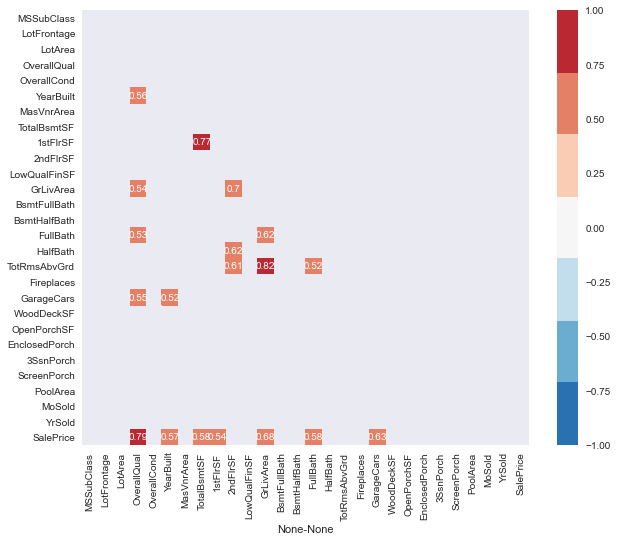

In [177]:
corrCoef_Threshold(df_ok, True)

The more interesting correlations are between the sale price and overall quality of a house (0.78) and between the sale price and the grand living area, which is the living area above the ground (0.66).

In addition, the sale price seems to have a positive correlation with the garage size, too.

### Bivariate analysis

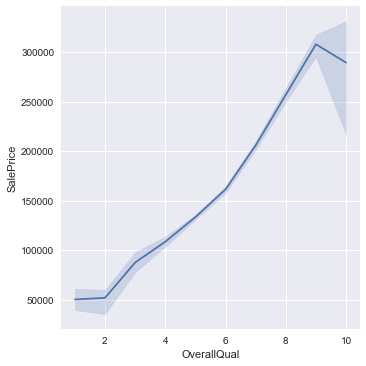

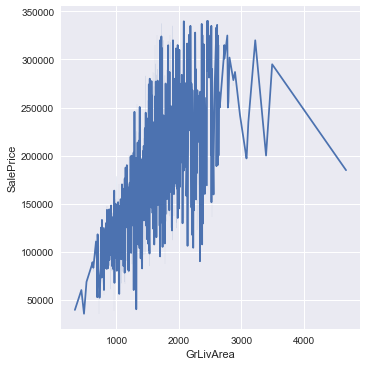

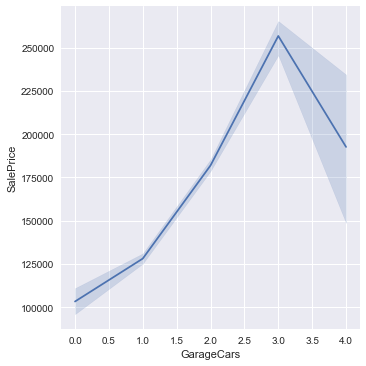

In [178]:
sns.relplot(data=df_ok, x='OverallQual', y='SalePrice', kind="line")
sns.relplot(data=df_ok, x='GrLivArea', y='SalePrice', kind="line")
sns.relplot(data=df_ok, x='GarageCars', y='SalePrice', kind="line")
plt.show()

# In the three cases the graph presents a similar tendency. When reaching a high quality overall,
# a big living area surface or a big garage surface, the house price starts to fall down a bit.

### Multivariate analysis

In [179]:
fig = px.scatter(df_ok, x= df_ok["OverallQual"], y = df_ok["GarageCars"], color= df_ok.SalePrice, size= df_ok.SalePrice,
                hover_data= ["SalePrice"])
fig.show()


# Best rated houses (with a rate of 7 or higher) tend to be the most expensive and those who have
# a garage surface of 2 ft at least. There is a "golden area" in the upper right part of the graph
# aka very expensive houses with an excellent rating and a quite big garage.

# On the other hand, cheaper houses (let's say under 150k) have a lower rating. Even if they may have
# a big garage, of course this is not enough to determine the overall quality of the house. This is why
# we have houses with very big garages (+4 ft) but with a low rating and a low price.

#  <font color='#0044FB'>Feature Engineering</font>

### Create new features

In [180]:
df_ok.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [181]:
df_ok.GrLivArea

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1393, dtype: int64

In [182]:
df_ok["1stFlrSF"]

0        856
1       1262
2        920
3        961
4       1145
        ... 
1455     953
1456    2073
1457    1188
1458    1078
1459    1256
Name: 1stFlrSF, Length: 1393, dtype: int64

In [183]:
df_ok["2ndFlrSF"]

0        854
1          0
2        866
3        756
4       1053
        ... 
1455     694
1456       0
1457    1152
1458       0
1459       0
Name: 2ndFlrSF, Length: 1393, dtype: int64

In [184]:
df_ok["LowQualFinSF"]

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: LowQualFinSF, Length: 1393, dtype: int64

In [185]:
df_ok['sum_1SF_2SF_LowQualSF'] =  df_ok['1stFlrSF'] + df_ok['2ndFlrSF'] + df_ok['LowQualFinSF']  
print(sum(df_ok['sum_1SF_2SF_LowQualSF'] != df_ok['GrLivArea']))

0


It seems that the "Above Grade Living Area" feature is the sum of 1st floor, 2nd floor and low quality square feet area.

In [186]:
# Create new features with engineering and check the correlations with the target variable

df_ok['TotalBathrooms'] = (df_ok['FullBath'] + (0.5 * df_ok['HalfBath']) +
                              df_ok['BsmtFullBath'] + (0.5 * df_ok['BsmtHalfBath']))

In [187]:
df_ok['TotalBathrooms'].corr(df_ok['SalePrice'])

0.634627781900601

In [188]:
df_ok['TotalPorchSF'] = (df_ok['OpenPorchSF'] + df_ok['3SsnPorch'] +
                              df_ok['EnclosedPorch'] + df_ok['ScreenPorch'] +
                              df_ok['WoodDeckSF'])

In [189]:
df_ok['TotalPorchSF'].corr(df_ok['SalePrice'])

0.37255251201457684

In [190]:
df_ok['GoodLivArea'] = df_ok['GrLivArea'] - df_ok["LowQualFinSF"]

In [191]:
df_ok['GoodLivArea'].corr(df_ok['SalePrice'])

0.6916615724275416

In [192]:
df_ok['TotalSF'] = df_ok['GoodLivArea'] + df_ok['TotalBsmtSF'] + df_ok["TotalPorchSF"]

In [193]:
df_ok['TotalSF'].corr(df_ok['SalePrice'])

0.7822714592037016

In [194]:
df_ok['TotalRooms'] = (df_ok['TotalBathrooms'] + df_ok["TotRmsAbvGrd"])

In [195]:
df_ok['TotalRooms'].corr(df_ok['SalePrice'])

0.6149086339252987

In [196]:
df_ok['HasPool'] = df_ok['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_ok['Has2ndFloor'] = df_ok['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_ok['HasBsmt'] = df_ok['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_ok['HasFireplace'] = df_ok['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [197]:
df_ok.drop(['sum_1SF_2SF_LowQualSF','1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'BsmtFullBath', "BsmtHalfBath"], axis=1, inplace=True)

In [198]:
df_ok.drop(["PoolQC", "PoolArea",'Fireplaces', '3SsnPorch', 'OpenPorchSF','EnclosedPorch', 'ScreenPorch','WoodDeckSF'], axis=1, inplace=True)

In [199]:
df_ok.drop(['TotalBsmtSF','GrLivArea',"TotalPorchSF","LowQualFinSF"], axis=1, inplace=True)

In [200]:
df_ok.drop(['TotalBathrooms',"TotRmsAbvGrd"], axis=1, inplace=True)

In [201]:
df_ok['PriceXSF'] = df_ok['SalePrice'] / df_ok['TotalSF']

In [202]:
df_ok['PriceXSF'].corr(df_ok['SalePrice'])

0.5076085634865932

In [203]:
df_ok.shape

(1393, 52)

In [204]:
df_ok.reset_index(inplace=True)
df_ok.columns

Index(['index', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'PavedDrive', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice', 'GoodLivArea',
       'TotalSF', 'TotalRooms', 'HasPool', 'Has2ndFloor', 'HasBsmt',
       'HasFireplace', 'PriceXSF'],
      dtype='object')

### Check (again) for outliers

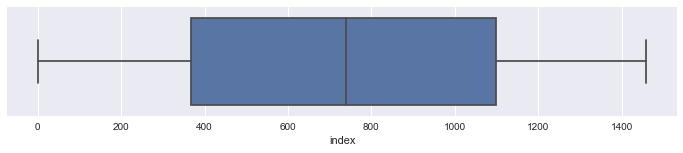

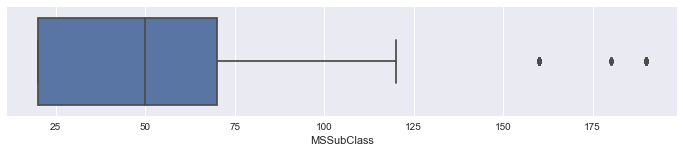

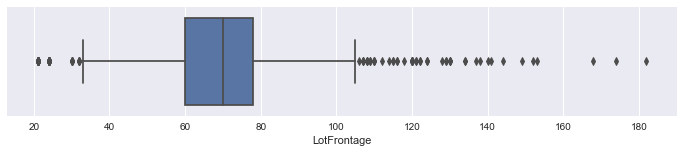

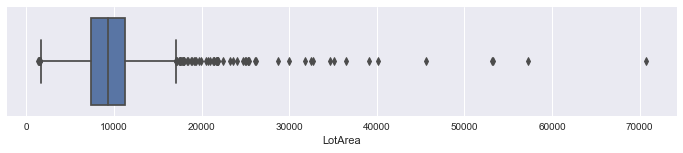

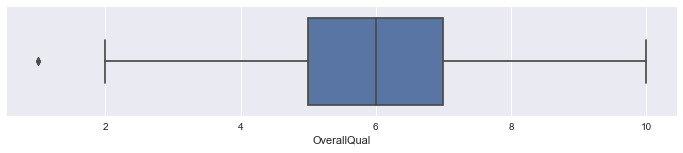

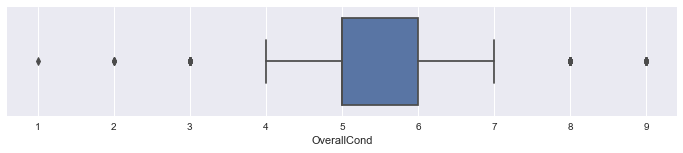

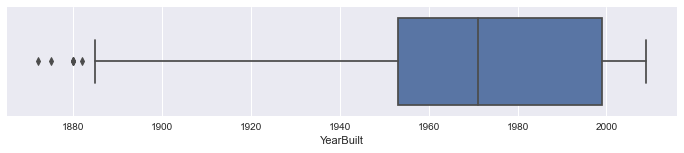

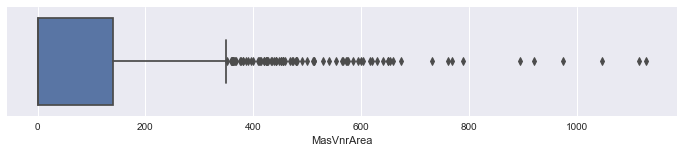

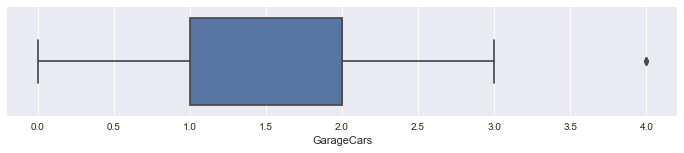

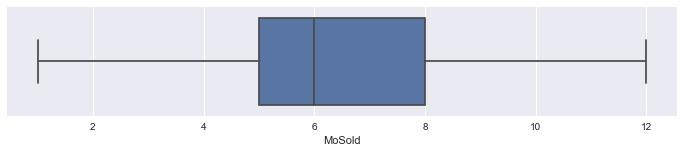

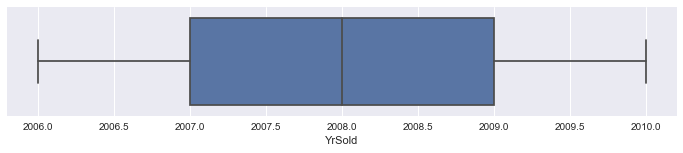

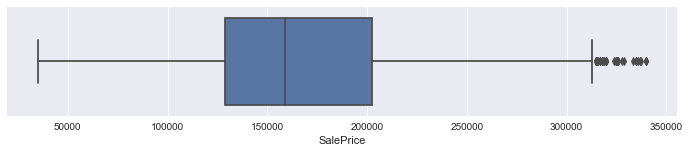

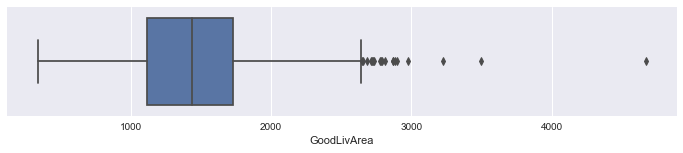

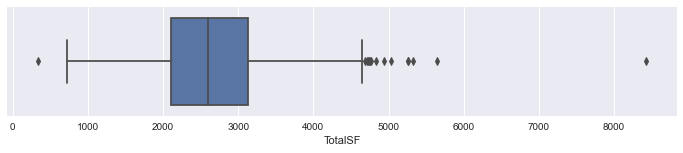

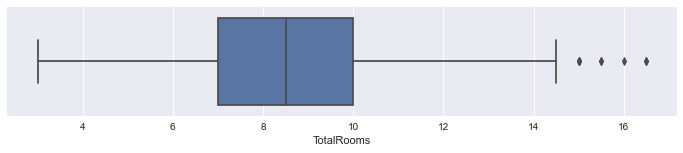

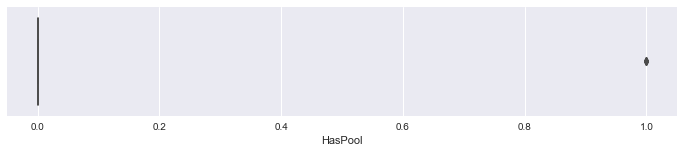

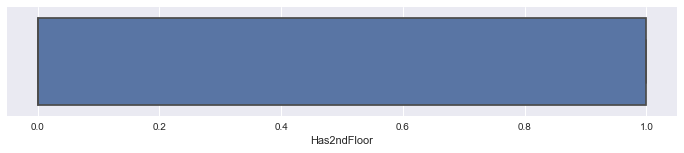

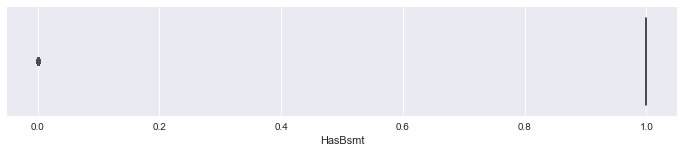

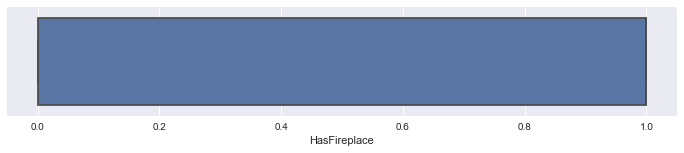

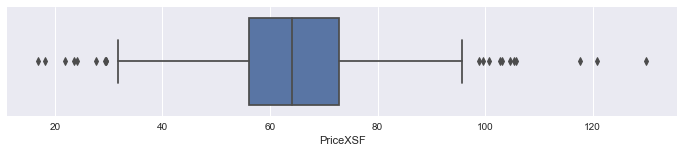

In [205]:
for col in df_ok:
    if df_ok[col].dtype == np.float64 or df_ok[col].dtype == np.int64:
        fig_dims = (12, 2)
        fig, ax = plt.subplots(figsize=fig_dims)
        sns.boxplot(x=df_ok[col],ax=ax)

In [206]:
# Remove manually the most evident outliers

df_ok = df_ok[df_ok['LotArea'] < 60000]
df_ok = df_ok[df_ok['GoodLivArea'] < 4000]
df_ok = df_ok[df_ok['TotalSF'] < 8000]

### New correlations analysis

In [207]:
corrMatrix(df_ok, 'magma')

In [208]:
# There are some features quite correlated between each other. Let's drop them

df_ok.drop(["YearBuilt", "TotalRooms", "GoodLivArea"], axis=1, inplace=True)

In [209]:
corrMatrix(df_ok, 'magma')

In [210]:
pd.DataFrame(abs(df_ok.corr()['SalePrice']).sort_values(ascending = False))

,SalePrice
SalePrice,1.000000
TotalSF,0.797420
OverallQual,0.791827
GarageCars,0.629611
PriceXSF,0.509109
HasFireplace,0.483228
MasVnrArea,0.360510
LotFrontage,0.322206
LotArea,0.319600
HasBsmt,0.179698


In [211]:
# There are some features with very little correlation with the target variable. Let's drop them

df_ok.drop(["YrSold", "HasPool", "MoSold", "MSSubClass"], axis=1, inplace=True)

In [212]:
df_ok.head()

,index,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageQual,PavedDrive,SaleType,SaleCondition,SalePrice,TotalSF,Has2ndFloor,HasBsmt,HasFireplace,PriceXSF
0,0,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,TA,Y,WD,Normal,208500,2627,1,1,0,79.368100
1,1,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,TA,Y,WD,Normal,181500,2822,0,1,1,64.316088
2,2,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,TA,Y,WD,Normal,223500,2748,1,1,1,81.331878
3,3,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,TA,Y,WD,Abnorml,140000,2780,1,1,1,50.359712
4,4,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,TA,Y,WD,Normal,250000,3619,1,1,1,69.079856


In [213]:
df_ok.columns

Index(['index', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'PavedDrive', 'SaleType', 'SaleCondition', 'SalePrice',
       'TotalSF', 'Has2ndFloor', 'HasBsmt', 'HasFireplace', 'PriceXSF'],
      dtype='object')

### Encoding categorical features

In [214]:
# Encode aka convert categorical features to numbers

data_cat = df_ok.select_dtypes(include = ['object'])
data_cat

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,...,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,...,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,1Fam,1Story,Gable,...,Y,SBrkr,TA,Typ,Attchd,RFn,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,...,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,1Fam,2Story,Gable,...,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,1Fam,2Story,Gable,...,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,RL,Pave,Reg,Lvl,Inside,Gtl,Gilbert,1Fam,2Story,Gable,...,Y,SBrkr,TA,Typ,Attchd,RFn,TA,Y,WD,Normal
1389,RL,Pave,Reg,Lvl,Inside,Gtl,NWAmes,1Fam,1Story,Gable,...,Y,SBrkr,TA,Min1,Attchd,Unf,TA,Y,WD,Normal
1390,RL,Pave,Reg,Lvl,Inside,Gtl,Crawfor,1Fam,2Story,Gable,...,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,Y,WD,Normal
1391,RL,Pave,Reg,Lvl,Inside,Gtl,NAmes,1Fam,1Story,Hip,...,Y,FuseA,Gd,Typ,Attchd,Unf,TA,Y,WD,Normal


In [215]:
data_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [216]:
def find_categorical_uniques(df):
    categorical_col = []
    for column in df.columns:
        if df[column].dtype == object and len(df[column].unique()) <= 20:
            categorical_col.append(column)
            print(f"{column} : {df[column].unique()}")
            print("====================================")
            print()
    return categorical_col

In [217]:
find_categorical_uniques(data_cat)

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']

Street : ['Pave' 'Grvl']

LotShape : ['Reg' 'IR1' 'IR2' 'IR3']

LandContour : ['Lvl' 'Bnk' 'HLS' 'Low']

LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

LandSlope : ['Gtl' 'Mod' 'Sev']

BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']

RoofMatl : ['CompShg' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'WdShngl' 'Roll']

Exterior1st : ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'CemntBd' 'Plywood'
 'AsbShng' 'Stucco' 'WdShing' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']

Exterior2nd : ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']

MasVnrType : ['BrkFace' 'None' 'Stone' 'BrkCmn']

ExterQual : ['Gd' 'TA' 'Ex' 'Fa']

ExterCond : ['TA' 'Gd' 'Fa' 'Po' 'Ex']

Foundation : ['P

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [218]:
data_cat.PavedDrive.value_counts()

Y    1271
N      90
P      30
Name: PavedDrive, dtype: int64

In [219]:
data_cat.CentralAir.value_counts()

Y    1296
N      95
Name: CentralAir, dtype: int64

In [220]:
data_cat.Street.value_counts()

Pave    1386
Grvl       5
Name: Street, dtype: int64

In [221]:
# These are some ordinal features that I will encode manually

dict_enc = dict(Po=0,Fa=1,TA=2,Gd=3,Ex=4)

df_ok.GarageQual = df_ok.GarageQual.map(dict_enc)
df_ok.KitchenQual = df_ok.KitchenQual.map(dict_enc)
df_ok.HeatingQC = df_ok.HeatingQC.map(dict_enc)
df_ok.BsmtCond = df_ok.BsmtCond.map(dict_enc)
df_ok.BsmtQual = df_ok.BsmtQual.map(dict_enc)
df_ok.ExterCond = df_ok.ExterCond.map(dict_enc)
df_ok.ExterQual = df_ok.ExterQual.map(dict_enc)


dict_enc2 = dict(N=0,P=1,Y=2)

df_ok.PavedDrive = df_ok.PavedDrive.map(dict_enc2)


dict_enc3 = dict(No=0, Gd=3 , Mn=1 , Av=2)

df_ok.BsmtExposure = df_ok.BsmtExposure.map(dict_enc3)

In [222]:
# Manually encode boolean / 2 categories features

dict_bool = dict(N=0,Y=1)
df_ok.CentralAir = df_ok.CentralAir.map(dict_bool)


dict_bool2 = dict(Grvl=0,Pave=1)
df_ok.Street = df_ok.Street.map(dict_bool2)

In [223]:
data_cat = df_ok.select_dtypes(include = ['object'])
data_cat.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtFinType1', 'Heating', 'Electrical', 'Functional', 'GarageType',
       'GarageFinish', 'SaleType', 'SaleCondition'],
      dtype='object')

### New correlations analysis

In [224]:
corrMatrix(df_ok, 'magma')

In [225]:
# There are some features quite correlated between each other and other that have very
# little correlation with the target feature. Let's drop them

df_ok.drop(["ExterQual", "BsmtQual","Street", "ExterCond", "OverallCond"], axis=1, inplace=True)

In [226]:
corrMatrix(df_ok, 'magma')

In [227]:
df_enc = ce.BinaryEncoder().fit_transform(data_cat)
df_enc.reset_index(inplace=True)
df_enc

,index,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,LotShape_0,LotShape_1,LotShape_2,LandContour_0,LandContour_1,...,GarageFinish_2,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3
0,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
1,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
2,2,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,3,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,4,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,1388,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
1387,1389,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1388,1390,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
1389,1391,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


### Feature scaling

In [228]:
# Scaling numerical continuous features

data_num = df_ok.select_dtypes(include = ['int64', 'float64'])

In [229]:
data_num.columns

Index(['index', 'LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea',
       'BsmtCond', 'BsmtExposure', 'HeatingQC', 'CentralAir', 'KitchenQual',
       'GarageCars', 'GarageQual', 'PavedDrive', 'SalePrice', 'TotalSF',
       'Has2ndFloor', 'HasBsmt', 'HasFireplace', 'PriceXSF'],
      dtype='object')

In [230]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 1392
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         1391 non-null   int64  
 1   LotFrontage   1391 non-null   float64
 2   LotArea       1391 non-null   int64  
 3   OverallQual   1391 non-null   int64  
 4   MasVnrArea    1391 non-null   float64
 5   BsmtCond      1391 non-null   int64  
 6   BsmtExposure  1391 non-null   int64  
 7   HeatingQC     1391 non-null   int64  
 8   CentralAir    1391 non-null   int64  
 9   KitchenQual   1391 non-null   int64  
 10  GarageCars    1391 non-null   int64  
 11  GarageQual    1391 non-null   int64  
 12  PavedDrive    1391 non-null   int64  
 13  SalePrice     1391 non-null   int64  
 14  TotalSF       1391 non-null   int64  
 15  Has2ndFloor   1391 non-null   int64  
 16  HasBsmt       1391 non-null   int64  
 17  HasFireplace  1391 non-null   int64  
 18  PriceXSF      1391 non-null 

In [231]:
data_noscale = data_num.drop(["LotFrontage","LotArea", "MasVnrArea", "TotalSF"], axis=1)

In [232]:
data_noscale.columns

Index(['index', 'OverallQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC',
       'CentralAir', 'KitchenQual', 'GarageCars', 'GarageQual', 'PavedDrive',
       'SalePrice', 'Has2ndFloor', 'HasBsmt', 'HasFireplace', 'PriceXSF'],
      dtype='object')

In [233]:
data_noscale.drop(["index"], axis=1, inplace=True)
data_noscale.reset_index(inplace=True)
data_noscale.drop(["index"], axis=1, inplace=True)
data_noscale

,OverallQual,BsmtCond,BsmtExposure,HeatingQC,CentralAir,KitchenQual,GarageCars,GarageQual,PavedDrive,SalePrice,Has2ndFloor,HasBsmt,HasFireplace,PriceXSF
0,7,2,0,4,1,3,2,2,2,208500,1,1,0,79.368100
1,6,2,3,4,1,2,2,2,2,181500,0,1,1,64.316088
2,7,2,1,4,1,3,2,2,2,223500,1,1,1,81.331878
3,7,3,0,3,1,3,3,2,2,140000,1,1,1,50.359712
4,8,2,2,4,1,3,3,2,2,250000,1,1,1,69.079856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,6,2,0,4,1,2,2,2,2,175000,1,1,1,66.287879
1387,6,2,0,2,1,2,2,2,2,210000,0,1,1,52.976791
1388,7,3,0,4,1,3,1,2,2,266500,1,1,1,75.028153
1389,5,2,1,3,1,3,1,2,2,142125,0,1,0,53.957859


In [234]:
data_toscale = data_num[["LotFrontage","LotArea", "MasVnrArea", "TotalSF"]]
dataname = data_toscale.columns

In [235]:
data_scaled = RobustScaler().fit_transform(data_toscale)
data_scaled = pd.DataFrame(data_scaled, columns= dataname)
data_scaled.reset_index(inplace=True)
data_scaled

,index,LotFrontage,LotArea,MasVnrArea,TotalSF
0,0,-0.280553,-0.221443,1.400000,0.030097
1,1,0.552780,0.077103,0.000000,0.219417
2,2,-0.113887,0.505452,1.157143,0.147573
3,3,-0.558331,0.064123,0.000000,0.178641
4,4,0.775002,1.286864,2.500000,0.993204
...,...,...,...,...,...
1386,1386,-0.447220,-0.359813,0.000000,0.042718
1387,1387,0.830558,1.005192,0.850000,1.328155
1388,1388,-0.224998,-0.067757,0.000000,0.928155
1389,1389,-0.113887,0.107477,0.000000,0.036893


In [236]:
df_scal = pd.concat([data_noscale, data_scaled], axis=1)
df_scal.drop(["index"], axis=1, inplace=True)
df_scal

,OverallQual,BsmtCond,BsmtExposure,HeatingQC,CentralAir,KitchenQual,GarageCars,GarageQual,PavedDrive,SalePrice,Has2ndFloor,HasBsmt,HasFireplace,PriceXSF,LotFrontage,LotArea,MasVnrArea,TotalSF
0,7,2,0,4,1,3,2,2,2,208500,1,1,0,79.368100,-0.280553,-0.221443,1.400000,0.030097
1,6,2,3,4,1,2,2,2,2,181500,0,1,1,64.316088,0.552780,0.077103,0.000000,0.219417
2,7,2,1,4,1,3,2,2,2,223500,1,1,1,81.331878,-0.113887,0.505452,1.157143,0.147573
3,7,3,0,3,1,3,3,2,2,140000,1,1,1,50.359712,-0.558331,0.064123,0.000000,0.178641
4,8,2,2,4,1,3,3,2,2,250000,1,1,1,69.079856,0.775002,1.286864,2.500000,0.993204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,6,2,0,4,1,2,2,2,2,175000,1,1,1,66.287879,-0.447220,-0.359813,0.000000,0.042718
1387,6,2,0,2,1,2,2,2,2,210000,0,1,1,52.976791,0.830558,1.005192,0.850000,1.328155
1388,7,3,0,4,1,3,1,2,2,266500,1,1,1,75.028153,-0.224998,-0.067757,0.000000,0.928155
1389,5,2,1,3,1,3,1,2,2,142125,0,1,0,53.957859,-0.113887,0.107477,0.000000,0.036893


#  <font color='#0044FB'>Machine Learning Pre-Modeling</font>

The aim is to predict the sale price of a house based on the characteristics shown in the dataset.

In [237]:
df_new = pd.concat([df_scal, df_enc], axis=1)
df_new

,OverallQual,BsmtCond,BsmtExposure,HeatingQC,CentralAir,KitchenQual,GarageCars,GarageQual,PavedDrive,SalePrice,...,GarageFinish_2,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3
0,7,2,0,4,1,3,2,2,2,208500,...,1,0,0,0,0,1,0,0,0,1
1,6,2,3,4,1,2,2,2,2,181500,...,1,0,0,0,0,1,0,0,0,1
2,7,2,1,4,1,3,2,2,2,223500,...,1,0,0,0,0,1,0,0,0,1
3,7,3,0,3,1,3,3,2,2,140000,...,0,0,0,0,0,1,0,0,1,0
4,8,2,2,4,1,3,3,2,2,250000,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,6,2,0,4,1,2,2,2,2,175000,...,1,0,0,0,0,1,0,0,0,1
1387,6,2,0,2,1,2,2,2,2,210000,...,0,0,0,0,0,1,0,0,0,1
1388,7,3,0,4,1,3,1,2,2,266500,...,1,0,0,0,0,1,0,0,0,1
1389,5,2,1,3,1,3,1,2,2,142125,...,0,0,0,0,0,1,0,0,0,1


### Target variable study

Skewness: 0.689449


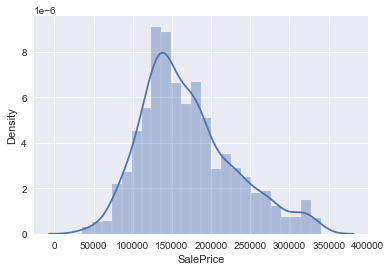

In [238]:
# Study of the target variable SalePrice

sns.distplot(df_new['SalePrice'])
print("Skewness: %f" % df_new['SalePrice'].skew())

In [239]:
# Log Transform

df_new["SalePrice"] = np.log(df_new["SalePrice"])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

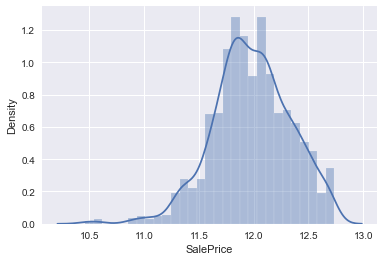

In [240]:
sns.distplot(df_new['SalePrice'])

#  <font color='#0044FB'>Machine Learning Modeling</font>

#  <font color='#0044FB'>Regression</font>

In this part I will predict the houses sales price using various kinds of regression algorithms.

In real estate it is often necessary to accurately predict the price of a house between sales. If a client is going to sell a house, you need to know what price tag to put on it and predictive modeling can be applied in property sale price prediction by analysing the housing dataset available and use machine learning models.

Owning (and eventually selling) a good property can help a client build wealth, often better and faster than other methods. Housing constitutes the most common means of accumulating personal wealth. However, since properties change ownerships relatively infrequently it is necessary to predict the house value between sales. The predicted values are used for various purposes such as home owners insurance. It is then necessary that these predictions are as accurate as possible.

## <font color=' #FD9404'>Multilinear Regression</font>

In [241]:
X = df_new.drop('SalePrice', axis=1)
y = df_new.SalePrice

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)

mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

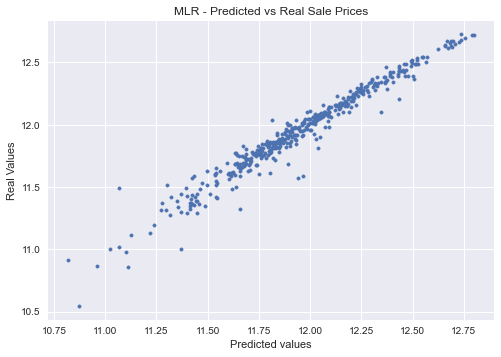

In [243]:
# Plotting predicted vs real values

plt.style.use('seaborn')
plt.scatter(y_pred, y_test, s=12)
plt.title('MLR - Predicted vs Real Sale Prices')
plt.xlabel('Predicted values')
plt.ylabel('Real Values')
plt.show()

### Model evaluation

In [244]:
# Cross Validation

cv_scoresM = cross_val_score(mlr, X_train, y_train,cv=10, scoring='r2')

print('Cross Validation R2_score: {}'.format(cv_scoresM.round(3)))
print("\nAverage 10-Fold CV R2_score: {}".format(np.mean(cv_scoresM).round(3)))

Cross Validation R2_score: [0.943 0.953 0.927 0.958 0.957 0.964 0.976 0.955 0.954 0.875]

Average 10-Fold CV R2_score: 0.946


In [245]:
# TRAIN

y_predTrain = mlr.predict(X_train)

MAE_lTrain = metrics.mean_absolute_error(y_train, y_predTrain)
MSE_lTrain = metrics.mean_squared_error(y_train,y_predTrain)
RMSE_lTrain = np.sqrt(metrics.mean_squared_error(y_train, y_predTrain))
R2_lTrain = r2_score(y_train, y_predTrain)

print('MAE:', MAE_lTrain)
print('MSE:', MSE_lTrain)
print('RMSE:', round(RMSE_lTrain,3))
print('R2 Score:', R2_lTrain)

MAE: 0.042393294289956696
MSE: 0.004219403247152704
RMSE: 0.065
R2 Score: 0.9666367082577952


In [246]:
# TEST

MAE_l = metrics.mean_absolute_error(y_test, y_pred)
MSE_l = metrics.mean_squared_error(y_test, y_pred)
RMSE_l = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_l = r2_score(y_test, y_pred)

print('MAE:', MAE_l)
print('MSE:', MSE_l)
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', R2_l)

MAE: 0.047663082899556605
MSE: 0.0053349792328545274
RMSE: 0.073
R2 Score: 0.9569203644249228


## <font color=' #FD9404'>Ridge Regression</font>

In [247]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridgeR = RidgeCV(alphas=ridge_alphas, cv=kf)

In [248]:
ridgeR = ridgeR.fit(X_train, y_train)

y_predRR = ridgeR.predict(X_test)

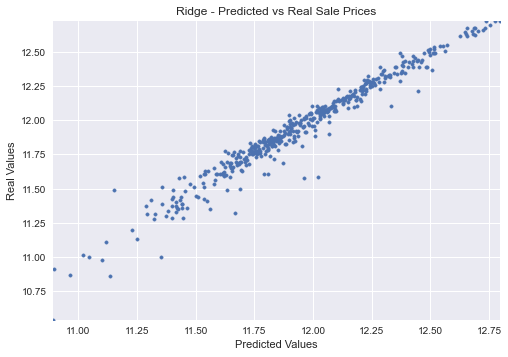

In [249]:
# Plotting predicted vs real values

y_pred_rr = pd.DataFrame(y_predRR).reset_index(drop=True)
y_test_rr = y_test.reset_index(drop=True, inplace=False)

pred_df_rr = pd.concat([y_test_rr,y_pred_rr], axis=1)

plt.scatter(pred_df_rr[0], pred_df_rr['SalePrice'], s=12)
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)

plt.title('Ridge - Predicted vs Real Sale Prices')
plt.show()

### Model evaluation

In [250]:
# Cross Validation

cv_scoresR = cross_val_score(ridgeR, X_train, y_train,cv=10, scoring='r2')

print('Cross Validation R2_score: {}'.format(cv_scoresR.round(3)))
print("\nAverage 10-Fold CV R2_score: {}".format(np.mean(cv_scoresR).round(3)))

Cross Validation R2_score: [0.957 0.963 0.939 0.963 0.963 0.97  0.973 0.959 0.951 0.884]

Average 10-Fold CV R2_score: 0.952


In [251]:
# TRAIN

y_predTrain = ridgeR.predict(X_train)

MAE_lTrain = metrics.mean_absolute_error(y_train, y_predTrain)
MSE_lTrain = metrics.mean_squared_error(y_train,y_predTrain)
RMSE_lTrain = np.sqrt(metrics.mean_squared_error(y_train, y_predTrain))
R2_rTrain = r2_score(y_train, y_predTrain)

print('MAE:', MAE_lTrain)
print('MSE:', MSE_lTrain)
print('RMSE:', round(RMSE_lTrain,3))
print('R2 Score:', R2_rTrain)

MAE: 0.04281584853775043
MSE: 0.004369235043692816
RMSE: 0.066
R2 Score: 0.9654519715432848


In [252]:
# TEST

MAE_l = metrics.mean_absolute_error(y_test, y_predRR)
MSE_l = metrics.mean_squared_error(y_test, y_predRR)
RMSE_l = np.sqrt(metrics.mean_squared_error(y_test, y_predRR))
R2_r = r2_score(y_test, y_predRR)

print('MAE:', MAE_l)
print('MSE:', MSE_l)
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', R2_r)

MAE: 0.047173918009178376
MSE: 0.0051819607457641755
RMSE: 0.072
R2 Score: 0.9581559794802742


## <font color=' #FD9404'>Lasso Regression</font>

In [253]:
la = LassoCV(alphas=ridge_alphas, cv=kf)

la = la.fit(X_train , y_train)

y_predLA = la.predict(X_test)

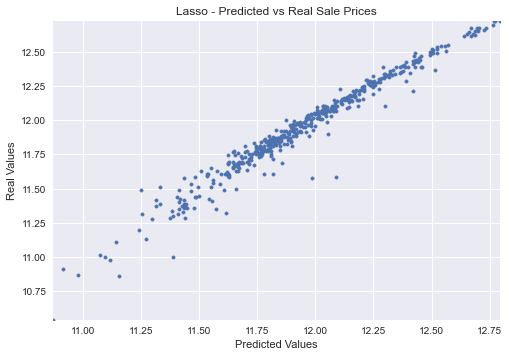

In [254]:
# Plotting predicted vs real values

y_pred_la = pd.DataFrame(y_predLA).reset_index(drop=True)
y_test_la = y_test.reset_index(drop=True, inplace=False)

pred_df_la = pd.concat([y_test_la,y_pred_la], axis=1)

plt.scatter(pred_df_la[0], pred_df_la['SalePrice'], s=12)
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)

plt.title('Lasso - Predicted vs Real Sale Prices')
plt.show()

### Model evaluation

In [255]:
# Cross Validation

cv_scoresL = cross_val_score(la, X_train, y_train,cv=10, scoring='r2')

print('Cross Validation R2_score: {}'.format(cv_scoresL.round(3)))
print("\nAverage 10-Fold CV R2_score: {}".format(np.mean(cv_scoresL).round(3)))

Cross Validation R2_score: [0.96  0.967 0.947 0.967 0.965 0.973 0.975 0.963 0.958 0.886]

Average 10-Fold CV R2_score: 0.956


In [256]:
# TRAIN

y_predTrain = la.predict(X_train)

MAE_lTrain = metrics.mean_absolute_error(y_train, y_predTrain)
MSE_lTrain = metrics.mean_squared_error(y_train,y_predTrain)
RMSE_lTrain = np.sqrt(metrics.mean_squared_error(y_train, y_predTrain))
R2_laTrain = r2_score(y_train, y_predTrain)

print('MAE:', MAE_lTrain)
print('MSE:', MSE_lTrain)
print('RMSE:', round(RMSE_lTrain,3))
print('R2 Score:', R2_laTrain)

MAE: 0.043725961033202455
MSE: 0.004756999069639893
RMSE: 0.069
R2 Score: 0.9623858781724901


In [257]:
# TEST

MAE_l = metrics.mean_absolute_error(y_test, y_predLA)
MSE_l = metrics.mean_squared_error(y_test, y_predLA)
RMSE_l = np.sqrt(metrics.mean_squared_error(y_test, y_predLA))
R2_la = r2_score(y_test, y_predLA)

print('MAE:', MAE_l)
print('MSE:', MSE_l)
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', R2_la)

MAE: 0.045425391107485044
MSE: 0.004924976964957998
RMSE: 0.07
R2 Score: 0.96023110801267


## <font color=' #FD9404'>Random Forest Regression</font>

In [258]:
rf = RandomForestRegressor(n_estimators=1500,
                          max_depth=100,random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, n_estimators=1500, random_state=42)

In [259]:
y_predRF = rf.predict(X_test)

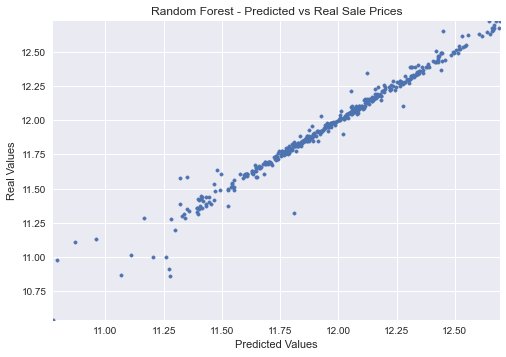

In [260]:
# Plotting predicted vs real values

y_pred_rf = pd.DataFrame(y_predRF).reset_index(drop=True)
y_test_rf = y_test.reset_index(drop=True, inplace=False)

pred_df_rf = pd.concat([y_test_rf,y_pred_rf], axis=1)

plt.scatter(pred_df_rf[0], pred_df_rf['SalePrice'], s=12)
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)

plt.title('Random Forest - Predicted vs Real Sale Prices')
plt.show()

### Model evaluation

In [261]:
# Cross Validation

cv_scoresRF = cross_val_score(rf, X_train, y_train,cv=10, scoring='r2')

print('Cross Validation R2_score: {}'.format(cv_scoresRF.round(3)))
print("\nAverage 10-Fold CV R2_score: {}".format(np.mean(cv_scoresRF).round(3)))

Cross Validation R2_score: [0.975 0.982 0.958 0.991 0.991 0.972 0.99  0.979 0.956 0.951]

Average 10-Fold CV R2_score: 0.975


In [262]:
# TRAIN

y_predTrain = rf.predict(X_train)

MAE_lTrain = metrics.mean_absolute_error(y_train, y_predTrain)
MSE_lTrain = metrics.mean_squared_error(y_train,y_predTrain)
RMSE_lTrain = np.sqrt(metrics.mean_squared_error(y_train, y_predTrain))
R2_rfTrain = r2_score(y_train, y_predTrain)

print('MAE:', MAE_lTrain)
print('MSE:', MSE_lTrain)
print('RMSE:', round(RMSE_lTrain,3))
print('R2 Score:', R2_rfTrain)

MAE: 0.009401957903967103
MSE: 0.0004578855377689414
RMSE: 0.021
R2 Score: 0.9963794480199468


In [263]:
# TEST

MAE_l = metrics.mean_absolute_error(y_test, y_predRF)
MSE_l = metrics.mean_squared_error(y_test, y_predRF)
RMSE_l = np.sqrt(metrics.mean_squared_error(y_test, y_predRF))
R2_rf = r2_score(y_test, y_predRF)

print('MAE:', MAE_l)
print('MSE:', MSE_l)
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', R2_rf)

MAE: 0.02627212211122729
MSE: 0.0032636185837189254
RMSE: 0.057
R2 Score: 0.9736464767516191


## <font color=' #FD9404'>Gradient Boosting Regression</font>

In [264]:
gb = GradientBoostingRegressor()

gb.fit(X_train,y_train)

y_predGB = gb.predict(X_test)

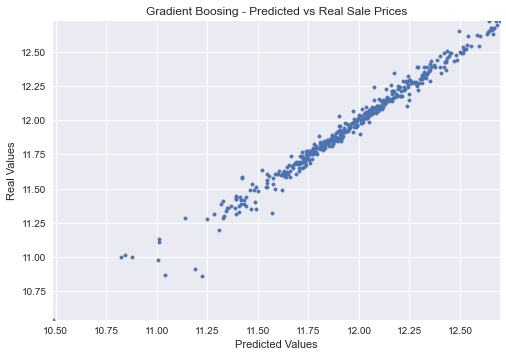

In [265]:
# Plotting predicted vs real values

y_pred_gb = pd.DataFrame(y_predGB).reset_index(drop=True)
y_test_gb = y_test.reset_index(drop=True, inplace=False)

pred_df_gb = pd.concat([y_test_gb,y_pred_gb], axis=1)

plt.scatter(pred_df_gb[0], pred_df_gb['SalePrice'], s=12)
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)

plt.title('Gradient Boosing - Predicted vs Real Sale Prices')
plt.show()

### Model evaluation

In [266]:
# Cross Validation

cv_scoresGB = cross_val_score(gb, X_train, y_train,cv=10, scoring='r2')

print('Cross Validation R2_score: {}'.format(cv_scoresGB.round(3)))
print("\nAverage 10-Fold CV R2_score: {}".format(np.mean(cv_scoresGB).round(3)))

Cross Validation R2_score: [0.988 0.986 0.983 0.99  0.986 0.981 0.985 0.984 0.982 0.961]

Average 10-Fold CV R2_score: 0.983


In [267]:
# TRAIN

y_predTrain = gb.predict(X_train)

MAE_lTrain = metrics.mean_absolute_error(y_train, y_predTrain)
MSE_lTrain = metrics.mean_squared_error(y_train,y_predTrain)
RMSE_lTrain = np.sqrt(metrics.mean_squared_error(y_train, y_predTrain))
R2_gTrain = r2_score(y_train, y_predTrain)

print('MAE:', MAE_lTrain)
print('MSE:', MSE_lTrain)
print('RMSE:', round(RMSE_lTrain,3))
print('R2 Score:', R2_gTrain)

MAE: 0.017455206416123272
MSE: 0.0004970691999212284
RMSE: 0.022
R2 Score: 0.9960696184361552


In [268]:
# TEST

MAE_l = metrics.mean_absolute_error(y_test, y_predGB)
MSE_l = metrics.mean_squared_error(y_test, y_predGB)
RMSE_l = np.sqrt(metrics.mean_squared_error(y_test, y_predGB))
R2_g = r2_score(y_test, y_predGB)

print('MAE:', MAE_l)
print('MSE:', MSE_l)
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', R2_g)

MAE: 0.030926312736830157
MSE: 0.0024894567493414415
RMSE: 0.05
R2 Score: 0.9798977868777639


#  <font color='#0044FB'> Conclusions</font>

In [272]:
print("*MLR Metrics*")
print('R2 Score Train:', R2_lTrain, "|", 'R2 Score Test:', R2_l)
print(" ")
print("*Ridge Metrics*")
print('R2 Score Train:', R2_rTrain, "|", 'R2 Score Test:', R2_r)
print(" ")
print("*Lasso Metrics*")
print('R2 Score Train:', R2_laTrain, "|", 'R2 Score Test:', R2_la)
print(" ")
print("*Random Forest Metrics*")
print('R2 Score Train:', R2_rfTrain, "|", 'R2 Score Test:', R2_rf)
print(" ")
print("*Gradient Boosting Metrics*")
print('R2 Score Train:', R2_gTrain, "|", 'R2 Score Test:', R2_g)

*MLR Metrics*
R2 Score Train: 0.9666367082577952 | R2 Score Test: 0.9569203644249228
 
*Ridge Metrics*
R2 Score Train: 0.9654519715432848 | R2 Score Test: 0.9581559794802742
 
*Lasso Metrics*
R2 Score Train: 0.9623858781724901 | R2 Score Test: 0.96023110801267
 
*Random Forest Metrics*
R2 Score Train: 0.9963794480199468 | R2 Score Test: 0.9736464767516191
 
*Gradient Boosting Metrics*
R2 Score Train: 0.9960696184361552 | R2 Score Test: 0.9798977868777639


As we can see from the R2 metric results, the best performing algorithm is the Gradient Boosting, followed by the Random Forest regressor.

In the Gradient Boosting test split we obtained a R2 of almost 0.98, which is very close to 1.

These metrics are satisfactory, therefore there is no need to perform hyperparameters tuning.